# Term Project1 - DSC680


# Safe Aquifers: Investigating Water Potability Trends for Public Health 

#### Author by: Shanthibooshan Subramanian

# Code for Term Project

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import ADASYN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
import time

## Data Preparation

In [31]:
# Load the dataset

water_potability_df = pd.read_csv('water_potability_new.csv')

# Display dataset dimensions

rows, columns = water_potability_df.shape
print(f"Dataset Dimensions: {rows} rows, {columns} columns")

# Preview the first few entries in the dataset to understand its structure and contents

water_potability_df



Dataset Dimensions: 3276 rows, 10 columns


ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [32]:
# Display column names and their data types

print("\nColumn Names and Data Types:")
print(water_potability_df.dtypes)


Column Names and Data Types:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [33]:
# Split data based on Potability

potable_df = water_potability_df[water_potability_df['Potability'] == 1]
non_potable_df = water_potability_df[water_potability_df['Potability'] == 0]

# Calculate summary statistics

summary_stats_all = water_potability_df.describe()
summary_stats_potable = potable_df.describe()
summary_stats_non_potable = non_potable_df.describe()

# Display summary statistics

print("Summary Statistics for All Data:")
print(summary_stats_all)

print("\nSummary Statistics for Potable Water (Potability = 1):")
print(summary_stats_potable)

print("\nSummary Statistics for Non-Potable Water (Potability = 0):")
print(summary_stats_non_potable)



Summary Statistics for All Data:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.17

The dataset was split into potable and non-potable subsets based on the Potability attribute. Summary statistics for each subset and the overall dataset were calculated and reviewed to understand key characteristics and distributions.

In [34]:
# Count missing values in each column

missing_values = water_potability_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


The dataset contains missing values in three columns: ph (491 missing values), Sulfate (781 missing values), and Trihalomethanes (162 missing values). All other columns have no missing values.

In [35]:
# Class distribution of target variable

class_distribution = water_potability_df['Potability'].value_counts()
print("\nClass Distribution (Potability):")
print(class_distribution)


Class Distribution (Potability):
0    1998
1    1278
Name: Potability, dtype: int64


The target variable Potability shows a distribution of 1,998 non-potable samples and 1,278 potable samples.

## Data Visualization

## Histograms for Numerical Variables

Visualizing the distribution of each numerical variable in the dataset to understand their spread and detect any potential skewness or outliers.

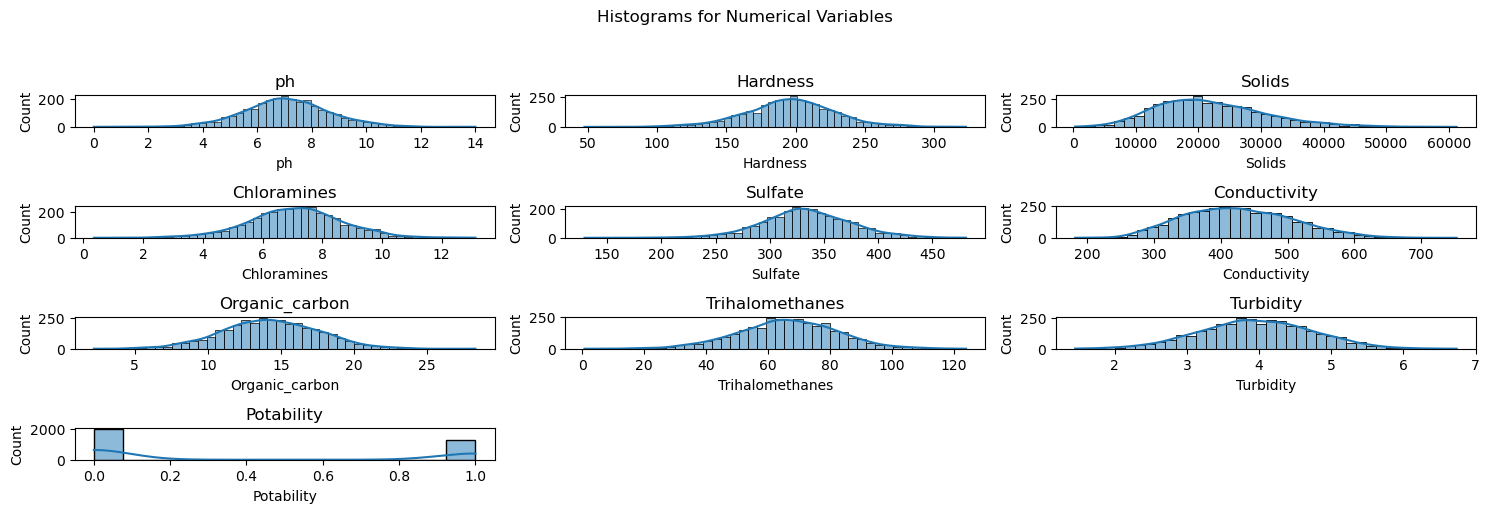

In [36]:
# Plot histograms for numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = water_potability_df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_columns)
num_rows = (num_cols - 1) 

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(water_potability_df[col], kde=True)
    plt.title(col)
plt.suptitle('Histograms for Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()



The histograms of water quality variables provide valuable insights into the distribution of data points across different parameters. pH levels are centered around 8 to 9, indicating a generally normal distribution with some extreme values at both ends, reflecting a range of acidity and alkalinity. 

Hardness values peak around 150 and exhibit a normal distribution, suggesting most samples have moderate hardness with some variability. Solids content is right-skewed, meaning that while most samples have lower solids, there are a few with significantly higher concentrations. Similarly, chloramines levels are right-skewed, with most samples showing low concentrations and a few with higher values. 

Sulfate concentrations follow a normal distribution with a peak around 200 to 250, indicating relatively stable sulfate levels. Conductivity is also right-skewed, with most samples having lower conductivity and some showing much higher values. 

Organic carbon levels are normally distributed with a peak around 15 to 20, suggesting that most samples have moderate levels of organic carbon. Trihalomethanes, like other parameters such as turbidity, are right-skewed, with most samples having low levels and a few with higher concentrations. 

The bar chart for potability reveals a clear imbalance, with a higher proportion of samples classified as potable. Overall, the histograms show that while some water quality parameters are normally distributed, others are skewed, highlighting potential issues such as contamination or extreme conditions.

## Boxplots for Outlier Detection

Examining the numerical variables in the dataset through boxplots to identify outliers and understand their distribution.

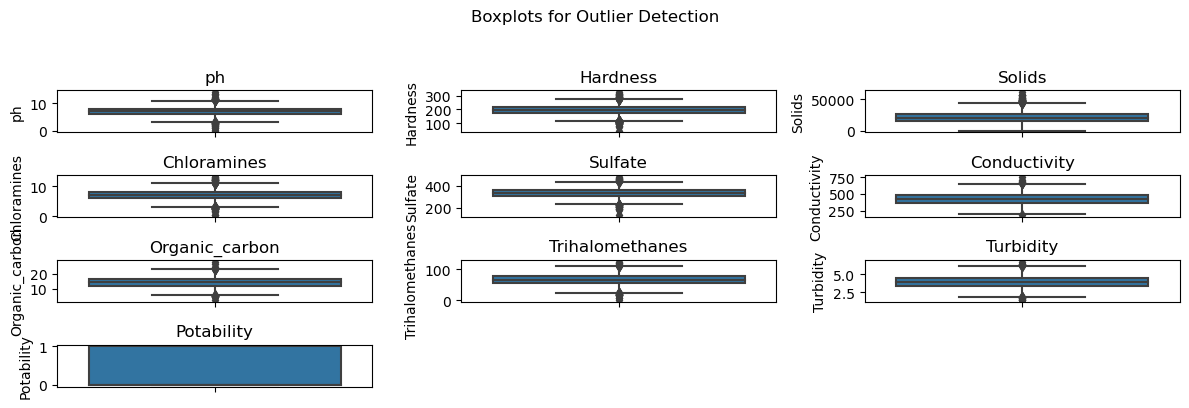

In [37]:
# Plot boxplots for numerical variables to detect outliers

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=water_potability_df[col])
    plt.title(col)
plt.suptitle('Boxplots for Outlier Detection', y=1.02)
plt.tight_layout()
plt.show()


The boxplots visualize the distribution of various water quality parameters, highlighting the median, interquartile range (IQR), whiskers, and outliers. This helps in identifying potential outliers, assessing data spread, and comparing central tendencies across different water quality measures.

## Pairplot to Visualize Relationships

Displaying pairwise relationships between variables, colored by the Potability target, to identify patterns or clusters

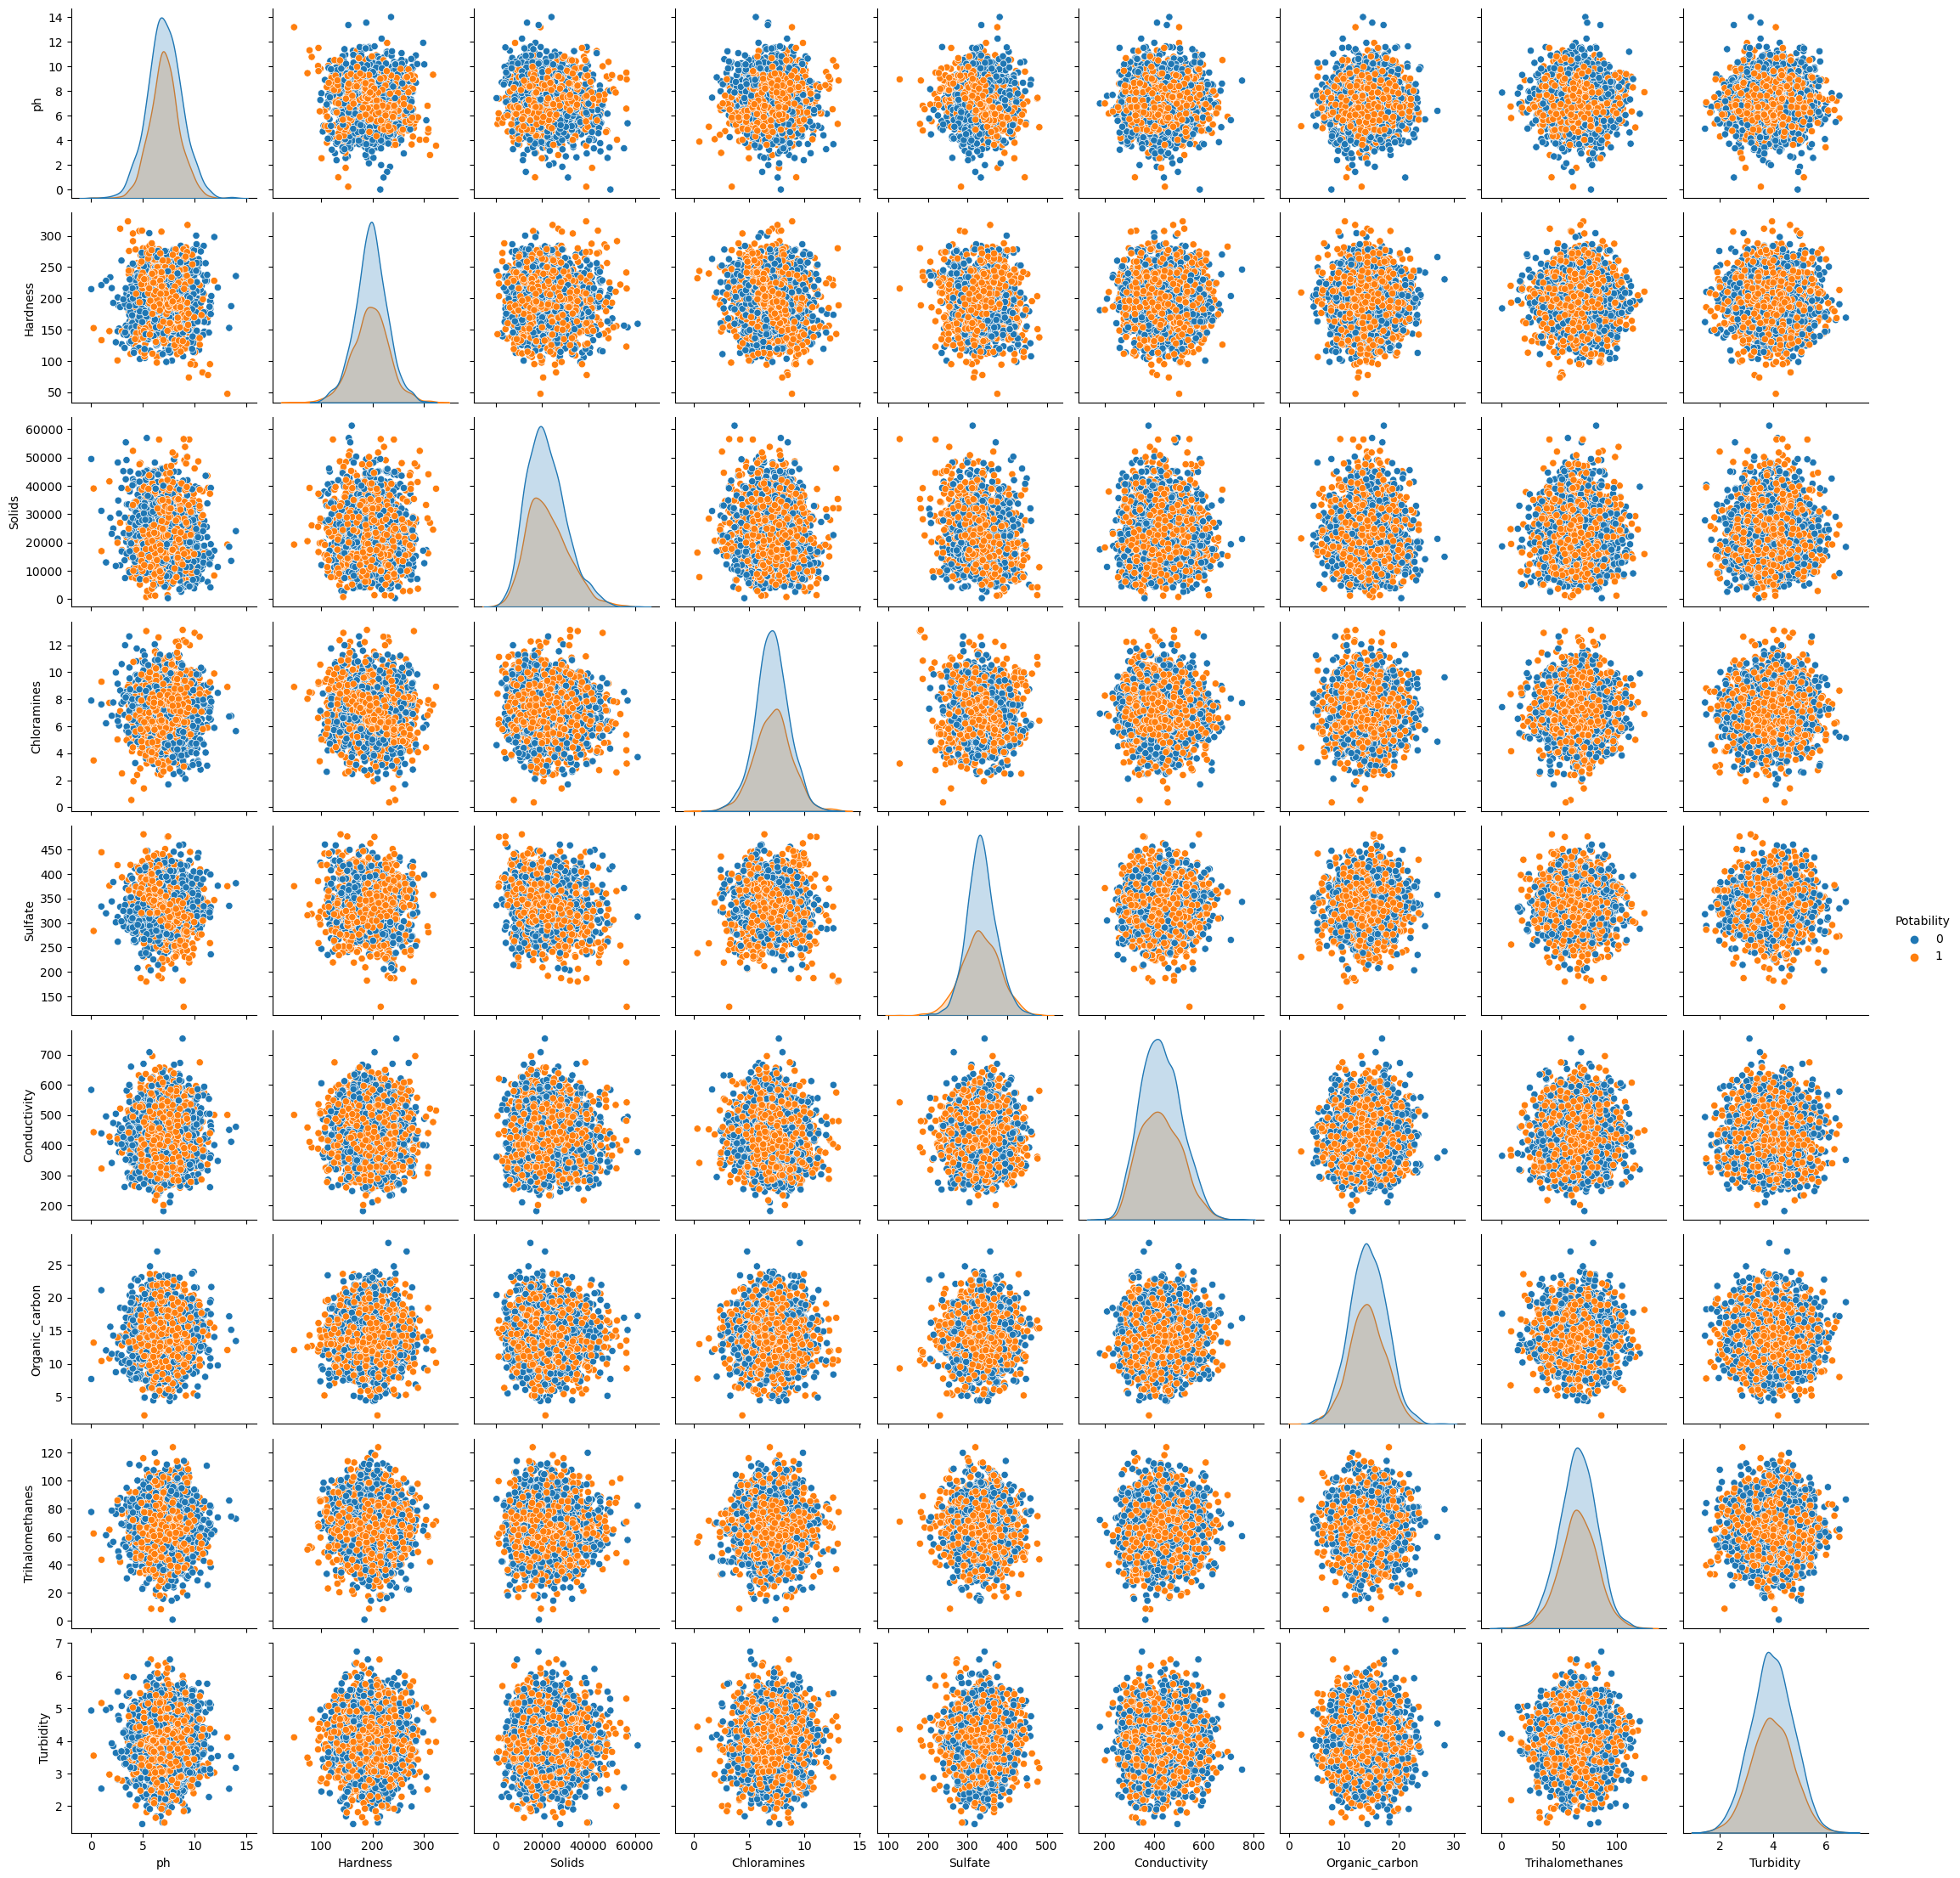

In [38]:
# Pairplot to visualize relationships between variables

sns.pairplot(water_potability_df, hue='Potability')
plt.show()

The pair plot highlights relationships between water quality parameters and water potability, revealing that several variables are right-skewed and contain outliers. It shows a positive correlation between Hardness and Solids, with clustering suggesting potential subgroups. However, significant overlap between potable and non-potable samples indicates that individual variables may not be strong predictors. Further steps should include correlation analysis, feature importance evaluation, handling outliers, dimensionality reduction, and model building to improve potability predictions.

## Pie Chart of Potability Distribution

The pie chart visualizes the distribution of water samples based on their potability. It shows the proportion of potable and non-potable samples, with color-coded segments for clear differentiation. 

In [39]:
# Calculate value counts for Potability
d = pd.DataFrame(water_potability_df['Potability'].value_counts())

# Create pie chart using Plotly Express
fig = px.pie(d, values='Potability', names=['Not Potable : 1', 'Potable : 0'], hole=0.8, opacity=0.8,
             color_discrete_sequence=['#1f77b4', '#ff7f0e'],
             labels={'1': 'Not Potable', '0': 'Potable', 'Potability': 'Sample Numbers'})

fig.add_annotation(text='Potability',
                   x=0.5, y=0.5, showarrow=False, font_size=14, opacity=0.7, font_family='monospace')

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()


The donut chart illustrates the distribution of water samples as potable and non-potable. With 61% of samples classified as non-potable and 39% as potable, the chart uses distinct colors and percentage labels to clearly compare these proportions. This visual effectively conveys the dataset's potability distribution.

## Correlation Heatmap

The heatmap displays correlations between water quality parameters, using color gradients and annotations to show the strength and direction of relationships. This helps in identifying key variable interactions for further analysis.

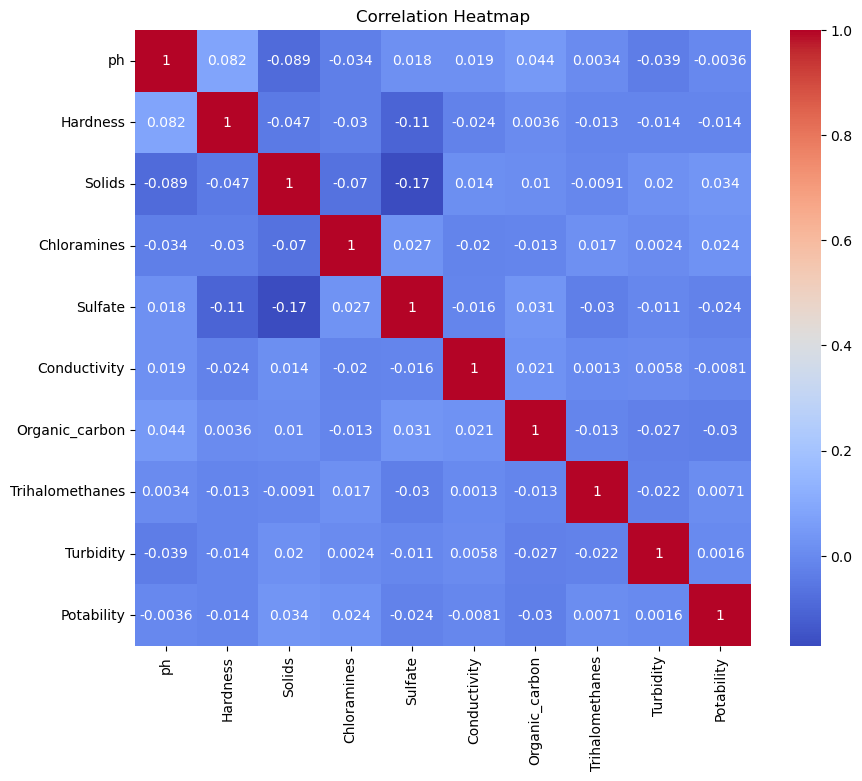

In [40]:
# Plot correlation heatmap

correlation_matrix = water_potability_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


The heatmap reveals that while certain relationships exist between water quality parameters, the overall correlation is relatively weak. This suggests that predicting water potability based solely on these variables may be challenging. Considering additional factors or features could improve predictive accuracy.

# Data Cleaning and Preprocessing

In [41]:
# Replace any empty strings with NaN (if needed)
water_potability_df.replace('', np.nan, inplace=True)

# Check for missing values
missing_values = water_potability_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values based on your strategy
# Example: Impute numerical columns with mean
mean_values = water_potability_df.mean()
water_potability_df.fillna(mean_values, inplace=True)

# Remove duplicate rows
water_potability_df.drop_duplicates(inplace=True)

# Cleaned dataset
cleaned_water_potability_df = water_potability_df.copy()

# Verify cleaned dataset
print("Cleaned Dataset Shape:", cleaned_water_potability_df.shape)


Missing Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Cleaned Dataset Shape: (3276, 10)


The dataset was cleaned by replacing empty strings with NaN, resulting in missing values for ph, Sulfate, and Trihalomethanes. Missing values were imputed with column means, and duplicate rows were removed. The cleaned dataset now has a shape of (3,276, 10), with no missing values remaining.

In [42]:
water_potability_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [43]:
# Replace null values in 'ph', 'Sulfate', and 'Trihalomethanes' with the mean value of their respective 'Potability' group

water_potability_df['ph'] = water_potability_df['ph'].fillna(water_potability_df.groupby('Potability')['ph'].transform('mean'))
water_potability_df['Sulfate'] = water_potability_df['Sulfate'].fillna(water_potability_df.groupby('Potability')['Sulfate'].transform('mean'))
water_potability_df['Trihalomethanes'] = water_potability_df['Trihalomethanes'].fillna(water_potability_df.groupby('Potability')['Trihalomethanes'].transform('mean'))

# Verify that there are no more null values in these columns
print(water_potability_df[['ph', 'Sulfate', 'Trihalomethanes']].isnull().sum())

# Display the DataFrame after handling missing values
print(water_potability_df)


ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64
            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654

Missing values in the columns ph, Sulfate, and Trihalomethanes were replaced with the mean values calculated within each Potability group. This process has successfully filled in all missing entries for these variables, as confirmed by the absence of NaN values. The cleaned dataset now contains 3,276 rows with no missing values.

# Balancing and Train the Dataset

In [44]:
# Separate features and target variable
X = water_potability_df.drop(columns=['Potability'])
y = water_potability_df['Potability'].values

# Apply PolynomialFeatures directly since there are no missing values
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Balance the dataset using ADASYN 
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_scaled, y)

# Print the shapes of the data after oversampling
print("Shape of X before oversampling:", X.shape)
print("Shape of y before oversampling:", y.shape)
print("Shape of X after oversampling:", X_res.shape)
print("Shape of y after oversampling:", y_res.shape)

# Print the value counts of the target variable after oversampling
print("Value counts of y before oversampling:")
print(pd.Series(y).value_counts())
print("Value counts of y after oversampling:")
print(pd.Series(y_res).value_counts())

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

Shape of X before oversampling: (3276, 9)
Shape of y before oversampling: (3276,)
Shape of X after oversampling: (4049, 219)
Shape of y after oversampling: (4049,)
Value counts of y before oversampling:
0    1998
1    1278
dtype: int64
Value counts of y after oversampling:
1    2051
0    1998
dtype: int64


The features and target variable were separated, and polynomial features were applied with a degree of 3. The dataset was then scaled, and ADASYN was used to balance the classes, resulting in 4,049 samples with an equal distribution of classes (1,998 non-potable and 2,051 potable). The final balanced dataset was split into training and testing sets.

# Model Building and Evaluation

The models were evaluated on accuracy, AUC, recall, precision, F1-score, Kappa, MCC, and training time. The evaluation included SVM, KNN, Decision Tree, Random Forest, CatBoost, LightGBM, and XGBoost. Each model's performance metrics were printed, showing detailed results for accuracy, AUC, recall, precision, F1-score, Kappa, MCC, and training time, along with confusion matrices and classification reports.

In [45]:
# Evaluate and compare the performance of several machine learning models on a dataset.

# Initialize models
models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
}

# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = []
    for model_name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        train_time = time.time() - start_time
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'AUC': auc,
            'Recall': recall,
            'Precision': precision,
            'F1': f1,
            'Kappa': kappa,
            'MCC': mcc,
            'Training Time (Sec)': train_time
        })
        print(f"Evaluation for {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"Kappa: {kappa:.4f}")
        print(f"MCC: {mcc:.4f}")
        print(f"Training Time: {train_time:.4f} seconds")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
    return pd.DataFrame(results)

# Evaluate models without tuning
results = evaluate_models(models, X_train, y_train, X_test, y_test)
print(results)


Evaluation for SVM:
Accuracy: 0.6630
AUC: 0.7244
Recall: 0.7751
Precision: 0.6441
F1-Score: 0.7036
Kappa: 0.3206
MCC: 0.3281
Training Time: 8.1905 seconds
Confusion Matrix:
[[213 179]
 [ 94 324]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.54      0.61       392
           1       0.64      0.78      0.70       418

    accuracy                           0.66       810
   macro avg       0.67      0.66      0.66       810
weighted avg       0.67      0.66      0.66       810


Evaluation for KNN:
Accuracy: 0.6469
AUC: 0.6801
Recall: 0.7560
Precision: 0.6320
F1-Score: 0.6885
Kappa: 0.2885
MCC: 0.2947
Training Time: 0.0691 seconds
Confusion Matrix:
[[208 184]
 [102 316]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.53      0.59       392
           1       0.63      0.76      0.69       418

    accuracy                           0.65       810
   macro avg  

## Model Evaluation Summary

SVM achieved an accuracy of 66.30%, with an AUC of 0.7244. It had a recall of 77.51% and a precision of 64.41%. The model took 8.19 seconds to train.

KNN recorded an accuracy of 64.69%, with an AUC of 0.6801. Its recall was 75.60% and precision was 63.20%, with a training time of just 0.07 seconds.

Decision Tree had an accuracy of 64.32% and an AUC of 0.6434. The recall was 63.88% and precision was 65.93%, with a training duration of 2.56 seconds.

Random Forest outperformed with an accuracy of 75.80%, an AUC of 0.8370, a recall of 78.47%, and a precision of 75.58%. It took 13.08 seconds to train.

CatBoost achieved an accuracy of 73.58%, with an AUC of 0.8107. Its recall was 74.88% and precision 74.17%, with a notable training time of 32.55 seconds.

LightGBM showed an accuracy of 73.09% and an AUC of 0.8168. It had a recall of 73.92% and a precision of 73.92%, with a training time of 1.18 seconds.

XGBoost delivered the highest accuracy at 74.69%, with an AUC of 0.8233. The recall was 78.23% and precision was 74.15%, and it took 2.82 seconds to train.

The Random Forest model demonstrated the best overall performance in terms of accuracy and AUC, making it the most effective model for this dataset. XGBoost also showed strong performance, particularly in recall and precision. CatBoost had the highest training time, yet performed well in accuracy and AUC. KNN was the fastest but had lower accuracy compared to others.

Hyperparameter tuning was performed to enhance model performance and achieve the best possible accuracy by systematically exploring different configurations. This process helps in optimizing the models’ settings, improving their predictive power, and ensuring they generalize well to unseen data.

In [50]:
# performs hyperparameter tuning using HalvingGridSearchCV 
# machine learning classifiers (Random Forest, CatBoost, LightGBM, and XGBoost)
# Evaluates their performance on the test set, and prints the best parameters and evaluation metrics.

# Define the parameter grids
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Correct values for max_features
}

catboost_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

lightgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127]
}

xgboost_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize classifiers
rf_clf = RandomForestClassifier(random_state=42)
catboost_clf = CatBoostClassifier(random_state=42, verbose=0)
lightgbm_clf = LGBMClassifier(
    learning_rate=0.05,
    max_depth=10,
    n_estimators=100,
    num_leaves=31,
    force_col_wise=True  # Add this parameter
)
xgboost_clf = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

# Perform HalvingGridSearchCV for Random Forest
rf_halving_grid_search = HalvingGridSearchCV(
    estimator=rf_clf,
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
rf_halving_grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", rf_halving_grid_search.best_params_)

# Perform HalvingGridSearchCV for CatBoost
catboost_halving_grid_search = HalvingGridSearchCV(
    estimator=catboost_clf,
    param_grid=catboost_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
catboost_halving_grid_search.fit(X_train, y_train)
print("Best Parameters for CatBoost:", catboost_halving_grid_search.best_params_)

# Perform HalvingGridSearchCV for LightGBM
lightgbm_halving_grid_search = HalvingGridSearchCV(
    estimator=lightgbm_clf,
    param_grid=lightgbm_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
lightgbm_halving_grid_search.fit(X_train, y_train)
print("Best Parameters for LightGBM:", lightgbm_halving_grid_search.best_params_)

# Perform HalvingGridSearchCV for XGBoost
xgboost_halving_grid_search = HalvingGridSearchCV(
    estimator=xgboost_clf,
    param_grid=xgboost_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
xgboost_halving_grid_search.fit(X_train, y_train)
print("Best Parameters for XGBoost:", xgboost_halving_grid_search.best_params_)

# Evaluate the best models on the test set and print results
best_rf = rf_halving_grid_search.best_estimator_
best_catboost = catboost_halving_grid_search.best_estimator_
best_lightgbm = lightgbm_halving_grid_search.best_estimator_
best_xgboost = xgboost_halving_grid_search.best_estimator_

for model_name, best_model in zip(
    ["Random Forest", "CatBoost", "LightGBM", "XGBoost"],
    [best_rf, best_catboost, best_lightgbm, best_xgboost]
):
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 13
max_resources_: 3239
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 324
n_resources: 13
Fitting 3 folds for each of 324 candidates, totalling 972 fits
----------
iter: 1
n_candidates: 108
n_resources: 39
Fitting 3 folds for each of 108 candidates, totalling 324 fits
----------
iter: 2
n_candidates: 36
n_resources: 117
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 3
n_candidates: 12
n_resources: 351
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 4
n_candidates: 4
n_resources: 1053
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 5
n_candidates: 2
n_resources: 3159
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
n_iterations: 5
n_req

## Hyperparameter Tuning Result Summary

Random Forest achieved an accuracy of 75.43%. The confusion matrix showed 289 true negatives, 103 false positives, 96 false negatives, and 322 true positives. The classification report indicated a precision of 0.75 for class 0 and 0.76 for class 1, with a recall of 0.74 for class 0 and 0.77 for class 1, and an overall F1-score of 0.75.

CatBoost had an accuracy of 75.31%. The confusion matrix resulted in 282 true negatives, 110 false positives, 90 false negatives, and 328 true positives. The classification report revealed a precision of 0.76 for class 0 and 0.75 for class 1, with a recall of 0.72 for class 0 and 0.78 for class 1, and an overall F1-score of 0.75.

LightGBM performed with an accuracy of 75.68%. Its confusion matrix included 286 true negatives, 106 false positives, 91 false negatives, and 327 true positives. The classification report showed a precision of 0.76 for both classes, with a recall of 0.73 for class 0 and 0.78 for class 1, and an overall F1-score of 0.76.

XGBoost had the lowest accuracy at 72.47%. The confusion matrix displayed 273 true negatives, 119 false positives, 104 false negatives, and 314 true positives. The classification report indicated a precision of 0.72 for class 0 and 0.73 for class 1, with a recall of 0.70 for class 0 and 0.75 for class 1, and an overall F1-score of 0.72.

LightGBM achieved the highest accuracy among the models, followed by Random Forest, CatBoost, and XGBoost.

## Conclusion

Best Model: Random Forest stands out as the most effective model overall. Initially, it achieved the highest accuracy of 75.80% and an AUC of 0.8370, indicating its strong performance in distinguishing between classes. After hyperparameter tuning, Random Forest's accuracy was 75.43%, with an F1-score of 0.75, showing consistent effectiveness.

Strong Performers: LightGBM showed the best performance in the hyperparameter tuning phase with an accuracy of 75.68%, the highest among the tuned models. Initially, it achieved an accuracy of 73.09% and an AUC of 0.8168. XGBoost delivered the highest accuracy initially at 74.69% but saw a reduction to 72.47% after tuning. Despite this, it maintained strong recall and precision.

Other Models: CatBoost provided a solid performance with an accuracy of 75.31% after tuning. Initially, it had an accuracy of 73.58%. SVM and KNN had lower overall performance metrics. SVM achieved an accuracy of 66.30% with a high recall but lower precision. KNN had an accuracy of 64.69% and was very fast but less accurate. Decision Tree had the lowest accuracy at 64.32% and performed poorly compared to the other models.

Conclusion: Random Forest is the top model for overall performance, both initially and after hyperparameter tuning. LightGBM and XGBoost are strong alternatives, with LightGBM excelling in the tuning phase. CatBoost performed well but had a higher training time. SVM and KNN, while faster, had lower performance, and Decision Tree was the least effective.